In [2]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
accelerate                    0.26.1
aiofiles                      22.1.0
aiohttp                       3.8.6
aiosignal                     1.3.1
aiosqlite                     0.19.0
anyio                         3.7.0
appdirs                       1.4.4
argcomplete                   3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
asttokens                     2.2.1
astunparse                    1.6.3
async-lru                     2.0.4
async-timeout                 4.0.3
attrs                         23.1.0
auto-gptq                     0.4.2+cu118
Babel                         2.12.1
backcall                      0.2.0
backoff                       2.2.1
backports.functools-lru-cache 1.6.5
bcrypt                        4.1.2
beautifulsoup4                4.12.2
bionemo                       0.3.1.post1

In [3]:
# === Step 2: Imports ===
import os
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
from nuscenes.nuscenes import NuScenes
import pandas as pd
from IPython.display import display, HTML

In [4]:
pwd

'/home/koshyreshma/ondemand'

In [5]:
from nuscenes.nuscenes import NuScenes
from PIL import Image
import matplotlib.pyplot as plt

# Initialize nuScenes object
nusc = NuScenes(version='v1.0-mini', dataroot='content/nuscenes_data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.538 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


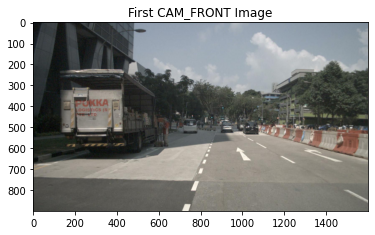

In [6]:
# Get the first sample (frame)
sample = nusc.sample[0]

# Get the camera data token
cam_token = sample['data']['CAM_FRONT']
cam_data = nusc.get('sample_data', cam_token)

# Get image path
img_path = f"content/nuscenes_data/{cam_data['filename']}"
img = Image.open(img_path)

# Show the image
plt.imshow(img)
plt.title("First CAM_FRONT Image")
#plt.axis('off')
plt.show()

In [7]:
import json

# Print the entire sample dictionary
print("=== Sample ===")
print(json.dumps(sample, indent=4))

# Also print metadata from the sensor (camera)
print("\n=== Sample Data (CAM_FRONT) ===")
print(json.dumps(cam_data, indent=4))

=== Sample ===
{
    "token": "ca9a282c9e77460f8360f564131a8af5",
    "timestamp": 1532402927647951,
    "prev": "",
    "next": "39586f9d59004284a7114a68825e8eec",
    "scene_token": "cc8c0bf57f984915a77078b10eb33198",
    "data": {
        "RADAR_FRONT": "37091c75b9704e0daa829ba56dfa0906",
        "RADAR_FRONT_LEFT": "11946c1461d14016a322916157da3c7d",
        "RADAR_FRONT_RIGHT": "491209956ee3435a9ec173dad3aaf58b",
        "RADAR_BACK_LEFT": "312aa38d0e3e4f01b3124c523e6f9776",
        "RADAR_BACK_RIGHT": "07b30d5eb6104e79be58eadf94382bc1",
        "LIDAR_TOP": "9d9bf11fb0e144c8b446d54a8a00184f",
        "CAM_FRONT": "e3d495d4ac534d54b321f50006683844",
        "CAM_FRONT_RIGHT": "aac7867ebf4f446395d29fbd60b63b3b",
        "CAM_BACK_RIGHT": "79dbb4460a6b40f49f9c150cb118247e",
        "CAM_BACK": "03bea5763f0f4722933508d5999c5fd8",
        "CAM_BACK_LEFT": "43893a033f9c46d4a51b5e08a67a1eb7",
        "CAM_FRONT_LEFT": "fe5422747a7d4268a4b07fc396707b23"
    },
    "anns": [
        "ef63

In [8]:
# === Step 3: Setup device ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
# === Step 4: Load model and processor ===
# from llava.model.builder import load_pretrained_model
# from llava.mm_utils import process_images, tokenizer_image_token
# from llava.conversation import conv_templates

model_name = "liuhaotian/llava-v1.5-7b"
print("Loading LLaVA model (this may take some minutes)...")
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16 if device.type == "cuda" else torch.float32,
    device_map="auto" if device.type == "cuda" else None
)
model.eval()

Loading LLaVA model (this may take some minutes)...


KeyError: 'llava'

In [12]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-34b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-34b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("mps:0")

ImportError: cannot import name 'LlavaNextProcessor'

In [14]:
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration

# Load the model in half-precision
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf", torch_dtype=torch.float16, device_map="auto")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

ImportError: cannot import name 'LlavaForConditionalGeneration'

In [1]:
pip show transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
!jupyter kernelspec list

Available kernels:
  ngc-pytorch-1.11            /apps/jupyterhub/kernels/NGC-Pytorch-1.11
  ngc-pytorch-1.9             /apps/jupyterhub/kernels/NGC-Pytorch-1.9
  ngc-pytorch-2.3             /apps/jupyterhub/kernels/NGC-Pytorch-2.3
  amuse-13.1.0                /apps/jupyterhub/kernels/amuse-13.1.0
  bionemo-0.3.1               /apps/jupyterhub/kernels/bionemo-0.3.1
  bionemo-1.3                 /apps/jupyterhub/kernels/bionemo-1.3
  cdrt-23.10                  /apps/jupyterhub/kernels/cdrt-23.10
  celloracle-0.20.0           /apps/jupyterhub/kernels/celloracle-0.20.0
  class-pha6936               /apps/jupyterhub/kernels/class-pha6936
  class-psb4934               /apps/jupyterhub/kernels/class-psb4934
  class-psb6088               /apps/jupyterhub/kernels/class-psb6088
  deeplabcut-2.2.1            /apps/jupyterhub/kernels/deeplabcut-2.2.1
  detectron2-0.5              /apps/jupyterhub/kernels/detectron2-0.5
  detectron2-0.6              /apps/jupyterhub/kernels/detectron2-0.6
  fas